# Exercise Set 8

Due: **9:30 30 May 2022**

Discussion: **13:00 3 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.constants as const
import astropy.units as u
import pandas as pd

# 1. Error Calculations [40 points]

Suppose we are viewing a binary orbit face-on. The primary star has mass $2.19^{+0.43}_{-0.41} M_\odot$, luminosity $60.8^{+1.3}_{-1.2} L_\odot$, and effective temperature $6595^{+53}_{-58} K$. The secondary star has mass $1.62^{+0.26}_{-0.32} M_\odot$, luminosity $3.2^{+0.7}_{-0.8} L_\odot$, and effective temperature $4284^{+78}_{-73} K$. The distance to the binary is determined to be $5pc$. Compute the following properties including error.

 > *hint: recall the solar values (without error)*
 
 >> $M_\odot = 1.989 \times 10^{30} kg$, 
 
 >> $m_\odot = -26.74$, 
 
 >> $L_\odot=3.828 \times 10^{26} \frac{J}{s}$, 
 
 >> $R_\odot = 6.955 \times 10^{8} m$, and 
 
 >> $T_{eff, \odot} = 5780 K$

**a)** What is the total mass of the binary? What is the reduced mass? **10 points**

 > *hint: the reduced mass of $M_1$ and $M_2$ is $\mu = \frac{M_1M_2}{M_1+M_2}$*

In [ ]:
# Mass1 and errors
M1 = 2.19
M1_u = 0.43
M1_l = 0.41
# Mass2 and errors
M2 = 1.62
M2_u = 0.26
M2_l = 0.32
# Total mass and errors
Mtot = M1 + M2
Mtot_u = np.sqrt(M1_u**2 + M2_u**2)
Mtot_l = np.sqrt(M1_l**2 + M2_l**2)

print(
    "Total mass:",
    Mtot,
    "(+",
    np.round(Mtot_u, 2),
    ",-",
    np.round(Mtot_l, 2),
    ") [Solar masses]",
)

# Reduced mass
def reduced_mass(M1, M2, M1_u, M1_l, M2_u, M2_l):
    Mtot = M1 + M2
    Mtot_u = np.sqrt(M1_u**2 + M2_u**2)
    Mtot_l = np.sqrt(M1_l**2 + M2_l**2)
    # calculate reduced mass
    mu = (M1 * M2) / Mtot
    # upper bound
    mu_u = abs(mu) * np.sqrt((M1_u / M1) ** 2 + (M2_u / M2) ** 2)
    # lower bound
    mu_l = abs(mu) * np.sqrt((M1_l / M1) ** 2 + (M2_l / M2) ** 2)
    print(
        "Reduced mass:",
        np.round(mu, 2),
        "(+",
        np.round(mu_u, 2),
        ",-",
        np.round(mu_l, 2),
        ") solar masses",
    )
    return mu, mu_u, mu_l


mu = reduced_mass(M1, M2, M1_u, M1_l, M2_u, M2_l)
# print("Reduced mass:",np.round(mu[0],2),"+",np.round(mu[1],2),"-",np.round(mu[2],2))

Total mass: 3.81 (+ 0.5 ,- 0.52 ) [Solar masses]
Reduced mass: 0.93 (+ 0.24 ,- 0.25 ) solar masses


**b)** What is the radius of each star? **10 points**

 > *hint: recall the equation for the luminosity of a star $L = 4\pi R^2 \sigma T_{eff}^4$, where $\sigma$ is the Stefan-Boltzmann constant*

In [ ]:
L1 = (60.8 * (u.L_sun)).to("J/s")
L1_u = (1.3 * (u.L_sun)).to("J/s")
L1_l = (1.2 * (u.L_sun)).to("J/s")
T1, T1_u, T1_l = [6595, 53, 58]
L2 = (3.2 * (u.L_sun)).to("J/s")
L2_u = (0.7 * (u.L_sun)).to("J/s")
L2_l = (0.8 * (u.L_sun)).to("J/s")
T2, T2_u, T2_l = [4284, 78, 73]


def rad_err(L, L_b, T, T_b):
    dL = L_b
    dT = T_b
    sigma = const.sigma_sb.value  # Steffan boltz in SI units
    T4 = T**4
    T5 = T4 * T
    term1 = np.sqrt(L / (4 * np.pi * sigma * T4)) * (1 / (2 * L))
    term2 = -2.0 * (1 / T) * np.sqrt(L / (4 * np.pi * sigma * T4))
    dr = np.sqrt((term1 * dL) ** 2 + (term2 * dT) ** 2).value
    return dr


def radius(L, L_u, L_l, T, T_u, T_l):
    sigma = const.sigma_sb.value  # Steffan boltz in SI units
    T4 = T**4
    R = (np.sqrt(L / (4 * np.pi * sigma * T4)).value * (u.m)).to("R_sun").value
    R_u = (rad_err(L, L_u, T, T_l) * (u.m)).to("R_sun").value
    R_l = (rad_err(L, L_l, T, T_u) * (u.m)).to("R_sun").value
    print(
        "Radius:",
        np.round(R, 2),
        "(+",
        np.round(R_u, 2),
        ",-",
        np.round(R_l, 2),
        ") [solar radii]",
    )
    return R, R_u, R_l


print("primary star:")
rad1 = radius(L1, L1_u, L1_l, T1, T1_u, T1_l)
print("secondary star:")
rad2 = radius(L2, L2_u, L2_l, T2, T2_u, T2_l)

primary star:
Radius: 5.97 (+ 0.12 ,- 0.11 ) [solar radii]
secondary star:
Radius: 3.25 (+ 0.37 ,- 0.42 ) [solar radii]


**c)** What is the flux coming from each star? What is the total flux? What is the apparent magnitude of the binary system? **20 points**

 > *hint: the flux is determined by $F = \sigma T_{eff}^4$, while apparant magnitude is given by $m = -2.5 log_{10}\left( \frac{F}{F_\odot} \right) + m_\odot$*

In [ ]:
def flux_err(T, T_b, F):
    dT = T_b
    df = F * 4 * dT / T
    return df


# Returns Flux and errors in W/m^2
def flux(T, T_u, T_l):
    sigma = const.sigma_sb.value  # Steffan boltz in SI units
    T4 = T**4
    F = sigma * T4
    F_u = flux_err(T, T_u, F)
    F_l = flux_err(T, T_l, F)
    print(
        "Flux:",
        np.format_float_scientific(F, 2),
        "(+",
        np.format_float_scientific(F_u, 2),
        ",-",
        np.format_float_scientific(F_l, 2),
        ")",
    )
    return F, F_u, F_l


print("primary star:")
F1 = flux(T1, T1_u, T1_l)
print("secondary star:")
F2 = flux(T2, T2_u, T2_l)

primary star:
Flux: 1.07e+08 (+ 3.45e+06 ,- 3.77e+06 )
secondary star:
Flux: 1.91e+07 (+ 1.39e+06 ,- 1.30e+06 )


In [ ]:
# apparent magnitude
def app_mag(F, F_u, F_l):
    T_sun = 5780
    print("Solar Flux:")
    Fsun = flux(T_sun, 0, 0)[0]
    Fr = F / Fsun
    F_ur = F_u / Fsun
    F_lr = F_l / Fsun
    sun_mag = -26.74
    m = -2.5 * (np.log10(Fr)) + sun_mag
    m_u = (2.5 * F_ur) / (Fr * 2.303)
    m_l = (2.5 * F_lr) / (Fr * 2.303)
    print(
        "Apparent magnitude:",
        np.round(m, 2),
        "(+",
        np.round(m_u, 2),
        ",-",
        np.round(m_l, 2),
        ")",
    )
    return m, m_u, m_l


print("primary star:")
am1 = app_mag(F1[0], F1[1], F1[2])
print("secondary star:")
am2 = app_mag(F2[0], F2[1], F2[2])

primary star:
Solar Flux:
Flux: 6.33e+07 (+ 0.e+00 ,- 0.e+00 )
Apparent magnitude: -27.31 (+ 0.03 ,- 0.04 )
secondary star:
Solar Flux:
Flux: 6.33e+07 (+ 0.e+00 ,- 0.e+00 )
Apparent magnitude: -25.44 (+ 0.08 ,- 0.07 )


# 2. PCA using covariance [60 points]

**a)** Read the paper! Remove data rows that have missing data. Create a table of the original data and compute mean value and standard deviation of each column. **10 Points**

In [ ]:
df = pd.read_csv(
    "quasar.dat",
    sep="\s+",
    header=4,
    skipfooter=9,
    names=[
        "PG Name",
        "log L1216",
        "alpha",
        "logFWHM Hbeta ",
        "FeII/ Hbeta ",
        "logEW [OIII]",
        "logFWHM CIII]",
        "logEW Lalpha",
        "logEW CIV",
        "CIV/ Lalpha",
        "logEW CIII]",
        "SiIII/ CIII]",
        "NV/ Lalpha",
        "1400A/ Lalpha",
    ],
    engine="python",
)
df.to_latex("tables/og_data.tex", index=False)
for i in range(len(df.columns)):
    col = df.columns[i]
    df = df[df[col] != "----"]
df.to_latex("tables/table.tex", index=False)
# df.to_markdown(index=False)

**b)** Take the original data and put it into normalized or weighted form, so that the effect of different units is effectively removed. Normalize by the standard deviation! **10 Points**

In [ ]:
# compute the mean and standard deviation of each column
cols = ["column"]
means = ["mean"]
stds = ["standard deviation"]
# print(df['alpha'].to_numpy())
for i in range(len(df.columns) - 1):
    col = df.columns[i + 1]
    cols.append(col)
    means.append(np.mean(df[col].to_numpy(dtype="float64")))
    stds.append(np.std(df[col].to_numpy(dtype="float64")))

stats = pd.DataFrame([means, stds], columns=cols)
stats.to_latex("tables/stats_table.tex", index=False)

In [ ]:
# subtract the mean and divide by standard deviation
df_norm = df
for i in range(len(df_norm.columns) - 1):
    col = df_norm.columns[i + 1]
    df_norm[col] = (df_norm[col].to_numpy(dtype="float64") - stats[col][0]) / stats[
        col
    ][1]
df_norm.to_latex("tables/standardized.tex", index=False)

**c)** Visually inspect the data after the normalization by plotting each column ($x$: data index, $y$: data value). Confirm (by eye) that each component is about normally distributed. **10 Points**

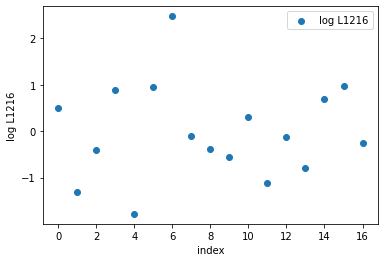

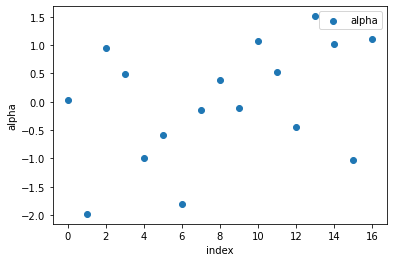

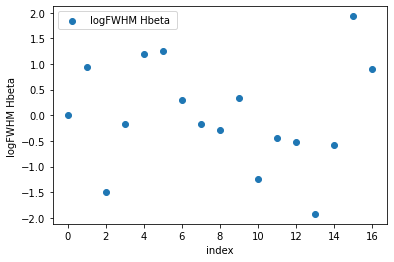

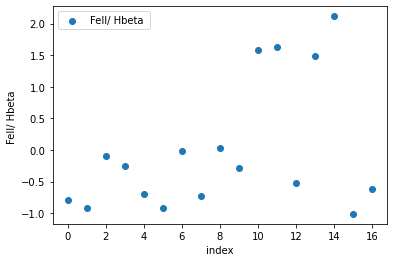

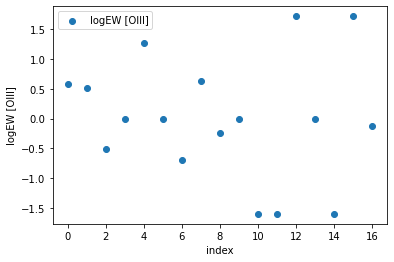

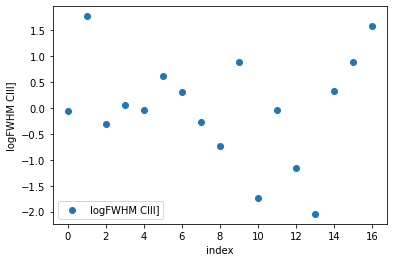

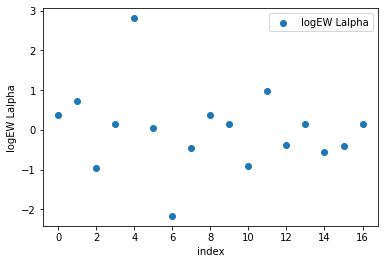

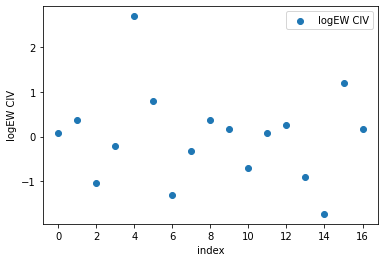

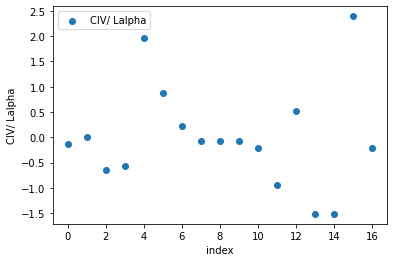

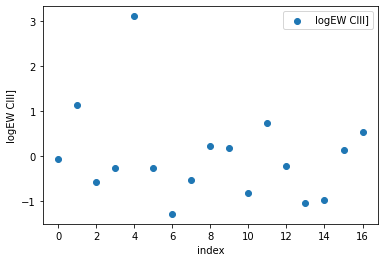

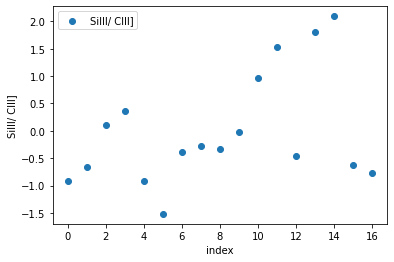

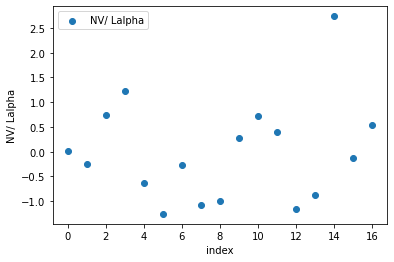

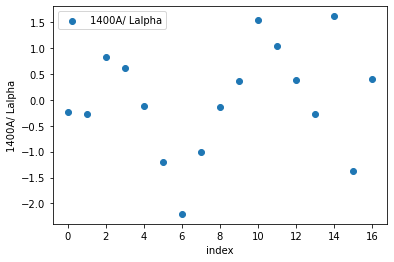

In [9]:
for i in range(len(df_norm.columns) - 1):
    col0 = df_norm.columns[0]
    col = df_norm.columns[i + 1]
    plt.figure(i)
    plt.scatter(np.arange(0, len(df_norm[col0]), 1), df_norm[col], label=str(col))
    # plt.xticks(np.arange(0,len(df_norm[col0]),1))
    plt.xlabel("index")
    plt.ylabel(str(col))
    plt.legend()
    plt.savefig("plots/fig" + str(i) + ".png", dpi=400, bbox_inches="tight")

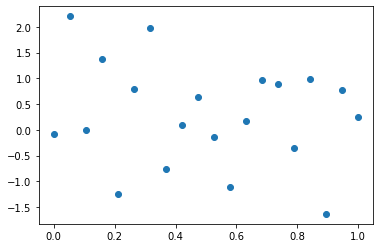

In [10]:
# Random normal distribution for comparison
dist = np.random.normal(loc=0.0, scale=1.0, size=20)
plt.scatter(np.linspace(0, 1, 20), dist)

**d)** Construct the covariance matrix. This is a $13\times13$ symmetric matrix. **10 Points**

$$ C_{ij} = \sigma_i \sigma_j $$

In [11]:
df_norm2 = df_norm.drop(
    "PG Name", axis=1
)  # data frame (standardized) without name column
df_cov = df_norm2.cov()
df_cov.to_latex("tables/cov.tex", index=False)
cov = df_cov.to_numpy(dtype="float64")
print(cov)
print(np.shape(cov))

[[ 1.0625     -0.16156062  0.11551354 -0.03785311 -0.15492448  0.06196355
  -0.81320334 -0.46720258  0.06414305 -0.72275883 -0.10027613  0.18910973
  -0.42480885]
 [-0.16156062  1.0625     -0.73374724  0.65568499 -0.53145285 -0.51644391
  -0.06998462 -0.46157682 -0.70100937 -0.3684895   0.66397927  0.44103882
   0.72333254]
 [ 0.11551354 -0.73374724  1.0625     -0.72879758  0.52839547  0.81748618
   0.32248408  0.72832554  0.82625317  0.56923045 -0.75312    -0.22121938
  -0.5523506 ]
 [-0.03785311  0.65568499 -0.72879758  1.0625     -0.83196181 -0.53768998
  -0.18043815 -0.62963704 -0.72942826 -0.40445375  0.9957673   0.54845274
   0.6316978 ]
 [-0.15492448 -0.53145285  0.52839547 -0.83196181  1.0625      0.15173859
   0.32493845  0.68914075  0.74057987  0.42265682 -0.68938549 -0.62545579
  -0.52229808]
 [ 0.06196355 -0.51644391  0.81748618 -0.53768998  0.15173859  1.0625
   0.13522301  0.27572362  0.30612978  0.37547547 -0.4883824   0.2092472
  -0.25212943]
 [-0.81320334 -0.06998462  

**e)** Compute the eigenvalues and eigenvectors of the covariance matrix. Plot the Eigenvalues against their number (index). Recreate Table 3 from Francis & Wills (1999). **10 Points**

[6.92954436e+00 3.02474389e+00 1.68521654e+00 6.05626765e-01
 6.28524808e-01 3.66295692e-01 2.78930990e-01 1.64567472e-01
 8.31842992e-02 2.39120717e-02 1.56342984e-02 8.76648843e-04
 5.44216430e-03]


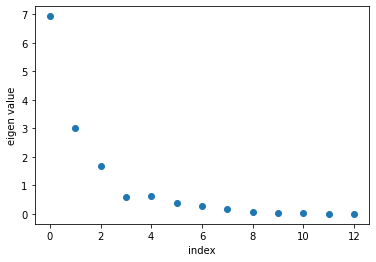

In [12]:
# eigenvalues and eigenvectors of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print(eig_val)
plt.figure()
plt.scatter(np.arange(0, len(eig_val), 1), eig_val)
plt.xlabel("index")
plt.ylabel("eigen value")
plt.savefig("plots/eigenvals.png", dpi=400, bbox_inches="tight")

In [19]:
# Recreate table 3
# First order eigvals and vecs in order of eigenvalues highest to lowest
idx = np.argsort(np.abs(eig_val))[::-1]
eVals = eig_val[idx]
eVecs = eig_vec[:, idx]


# print(eVals)

# select the first 5 eigenvectors, 5 is desired dimension for table 3

n_components = 5
eVecs_subset = eVecs[:, 0:n_components]
eVals_subset = eVals[0:n_components]

reduced = np.dot(eVecs_subset.T, cov.T).T
# print(np.shape(reduced))
pca = pd.DataFrame(reduced, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
# df_eVals=pd.DataFrame(eVals_subset,index=0)
pca.to_latex("tables/pca.tex", index=False)

# Calcute the proportion of variance and cumulative proportion of variance
proportion = []
cumulative = []
cum = 0.0
sum = np.sum(eVals_subset)
for i in range(len(eVals_subset)):
    val = eVals_subset[i]
    prop = val / sum
    cum += prop
    proportion.append(prop)
    cumulative.append(cum)

indices = ["Eigenvalue", "Proportion", "Cumulative", "Variable"]
indices.extend(df_norm2.columns)

# make a new data frame with the eiegenval row put first and every other row +1 index
fig3 = pd.DataFrame(columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
fig3.loc[0] = np.round(eVals_subset, 4)
fig3.loc[1] = np.round(np.asarray(proportion), 3)
fig3.loc[2] = np.round(np.asarray(cumulative), 3)
fig3.loc[3] = fig3.columns
fig3 = fig3.append(np.round(pca, 3), ignore_index=True)
fig3 = fig3.set_index(pd.Index(indices))

# get latex string via `.to_latex()`
latex = fig3.to_latex(
    index_names=True,
    column_format="rrrrrr",
    caption=r"Results of Eigenanalysis - The Principal Components\textsuperscript{$\alpha$}",
)

# split lines into a list
latex_list = latex.splitlines()

# add [h!] for position to first line
latex_list[0] = latex_list[0] + "[h!]"

# insert a `\midrule` above and below PC
latex_list.insert(10, "\midrule")
latex_list.insert(12, "\midrule")


# join split lines to get the modified latex output string
latex_new = "\n".join(latex_list)

with open("tables/fig3.tex", "w") as f:
    f.write(latex_new)
""" Table shown in attached PDF"""

' Table shown in attached PDF'

**f)** Compute errors of the eigenvalues with a bootstrap analysis or jackknife. Use sample size of 10000. Plot the distributions for the first 5 eigenvalues. **10 Points**

In [ ]:
n_components = 5
e1, e2, e3, e4, e5 = [], [], [], [], []
for i in range(10000):
    N = np.zeros((13, 13))  # 13x13 matrix of zeros
    for k in range(13):
        for q in range(13):
            i, j = np.random.randint(0, 13, size=2)
            N[k][q] = cov[i][j]

    eig_val, eig_vec = np.linalg.eig(N)
    idx = np.argsort(np.abs(eig_val))[::-1]
    eVals = eig_val[idx]
    eVals_subset = eVals[0:n_components]
    e1.append(eVals_subset[0])
    e2.append(eVals_subset[1])
    e3.append(eVals_subset[2])
    e4.append(eVals_subset[3])
    e5.append(eVals_subset[4])

: 

: 

/home/tom/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:851: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/tom/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/tom/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:1966: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


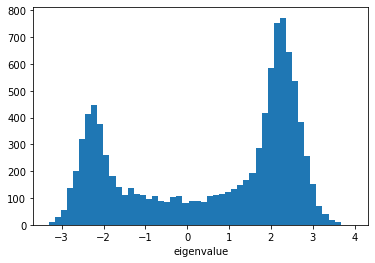

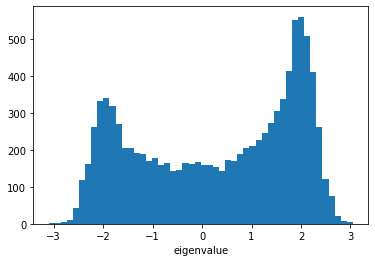

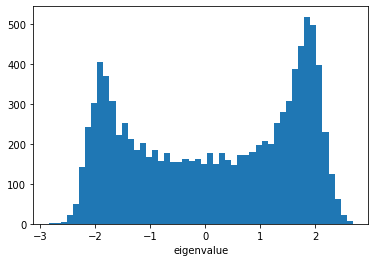

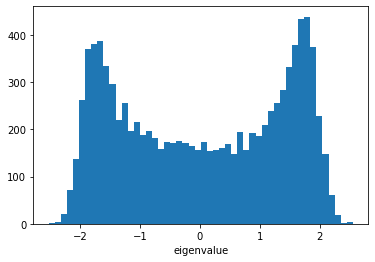

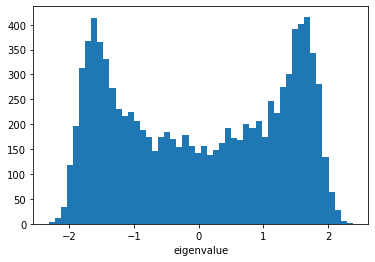

: 

: 

In [ ]:
es = np.array([e1, e2, e3, e4, e5])
# Now plot the distributions of the 5 eigenvalues
for i in range(5):
    plt.figure()
    plt.hist(es[i], bins=50)
    plt.xlabel("eigenvalue")
    plt.savefig("plots/eig_dist" + str(i) + ".png", dpi=400, bbox_inches="tight")

    # Compute the errors?